# Testing src functions

In [1]:
from src import models, datasets, trainer, analysis
import torch
from torch.utils.data import DataLoader
import yaml
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
rnn = torch.load('test_multitau_0/best_model.pth')

/var/folders/48/lxr9wxxd4yq06qqj9jrz69780000gt/T/ipykernel_77755/1029680666.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  rnn = torch.load('test_multitau_0/best_model.

In [17]:
rnn = torch.load('decay_review_0//best_model.pth')


/var/folders/48/lxr9wxxd4yq06qqj9jrz69780000gt/T/ipykernel_83075/2774816316.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  rnn = torch.load('decay_review_0//best_model.

In [18]:
from itertools import accumulate
tau_array = torch.zeros(100, dtype=torch.float32)
tausizes = [int(p * 100) for p in [0.5, 0.5]]
tauindices = [0] + list(accumulate(tausizes))

for i, tau in enumerate([1, 10]):
    tau_array[tauindices[i]:tauindices[i+1]] = tau
fitmodel = models.MultiTauRNN(2,100,1,0.01,tau_array,'relu', sigma_in=0.01)

In [21]:
fitmodel = models.expirimental_RNN(6,100,1,0.01,1,'relu', sigma_in=0.05)

AttributeError: module 'src.models' has no attribute 'expirimental_RNN'

In [ ]:
fitmodel.load_state_dict(rnn)

RuntimeError: Error(s) in loading state_dict for EI_RNN:
	Missing key(s) in state_dict: "hh", "bias". 
	Unexpected key(s) in state_dict: "hh.weight", "hh.bias". 
	size mismatch for ih.weight: copying a param with shape torch.Size([100, 6]) from checkpoint, the shape in current model is torch.Size([100, 2]).

In [ ]:
fitmodel.eval()

MultiTauRNN(
  (ih): Linear(in_features=2, out_features=100, bias=True)
  (hh): Linear(in_features=100, out_features=100, bias=True)
  (ho): Linear(in_features=100, out_features=1, bias=True)
)

In [ ]:
with open('test_multitau_0/config.yaml', 'r') as file:
        conf = yaml.safe_load(file)

In [ ]:
with open('PC_EI_0/config.yaml', 'r') as file:
        conf = yaml.safe_load(file)

In [ ]:
alldata = datasets.perceptualClassification(0, 6, conf['expt']['stim_start_min'], conf['expt']['stim_start_max'], symmetric=False, duration=conf['expt']['duration'], dt=conf['model']['dt'], size=100)

In [ ]:
alldata = datasets.perceptualClassification_50_test(0, conf['expt']['stim_start_min'], conf['expt']['stim_start_max'], conf['expt']['symmetric'], conf['expt']['duration'], conf['model']['dt'], 100)

In [ ]:
plotting_data = next(iter(DataLoader(alldata, batch_size=10, shuffle=True, num_workers=0)))

In [ ]:
plotting_data

[tensor([[[0.0000, 0.0000],
          [0.0000, 0.0000],
          [0.0000, 0.0000],
          ...,
          [0.5000, 0.5000],
          [0.5000, 0.5000],
          [0.5000, 0.5000]],
 
         [[0.0000, 0.0000],
          [0.0000, 0.0000],
          [0.0000, 0.0000],
          ...,
          [0.5000, 0.5000],
          [0.5000, 0.5000],
          [0.5000, 0.5000]],
 
         [[0.0000, 0.0000],
          [0.0000, 0.0000],
          [0.0000, 0.0000],
          ...,
          [0.5000, 0.5000],
          [0.5000, 0.5000],
          [0.5000, 0.5000]],
 
         ...,
 
         [[0.0000, 0.0000],
          [0.0000, 0.0000],
          [0.0000, 0.0000],
          ...,
          [0.5000, 0.5000],
          [0.5000, 0.5000],
          [0.5000, 0.5000]],
 
         [[0.0000, 0.0000],
          [0.0000, 0.0000],
          [0.0000, 0.0000],
          ...,
          [0.5000, 0.5000],
          [0.5000, 0.5000],
          [0.5000, 0.5000]],
 
         [[0.0000, 0.0000],
          [0.0000, 0.0000]

Outputs shape: torch.Size([10, 2002, 1]), Hidden shape: torch.Size([2002, 10, 100]), Targets shape: torch.Size([10, 2002])


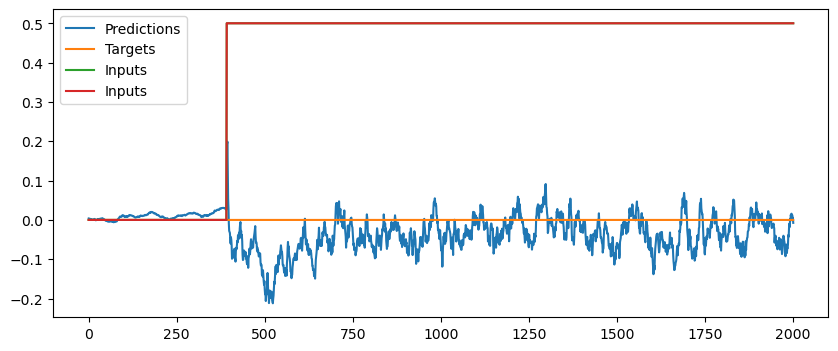

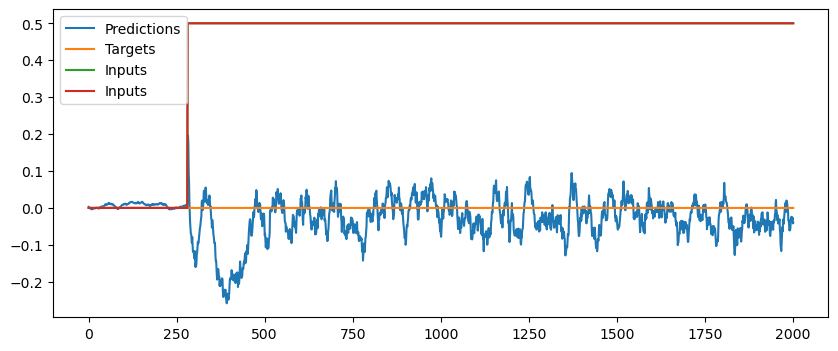

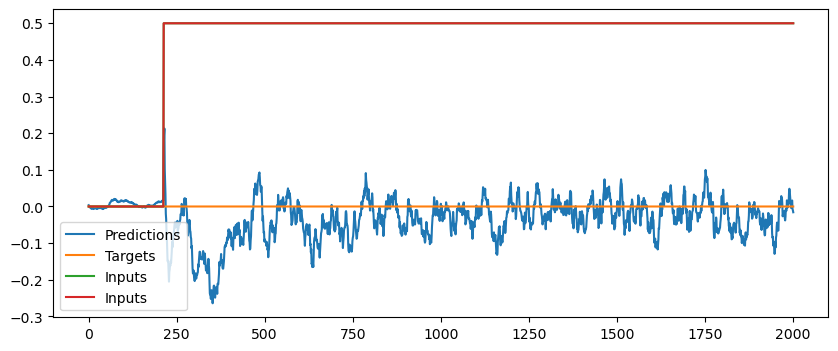

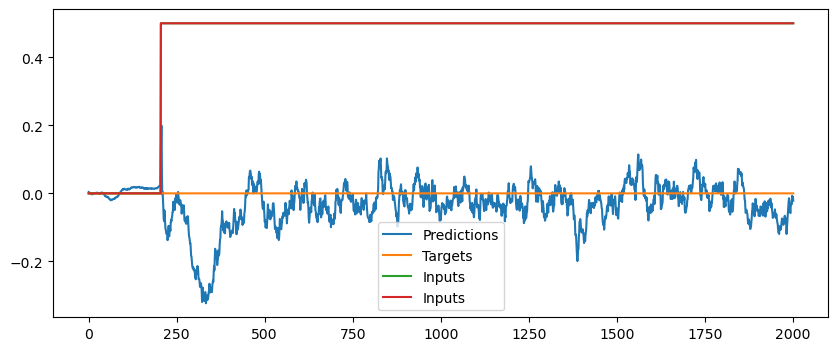

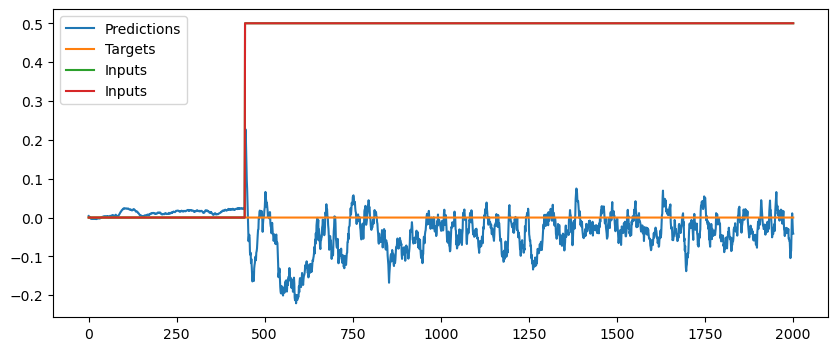

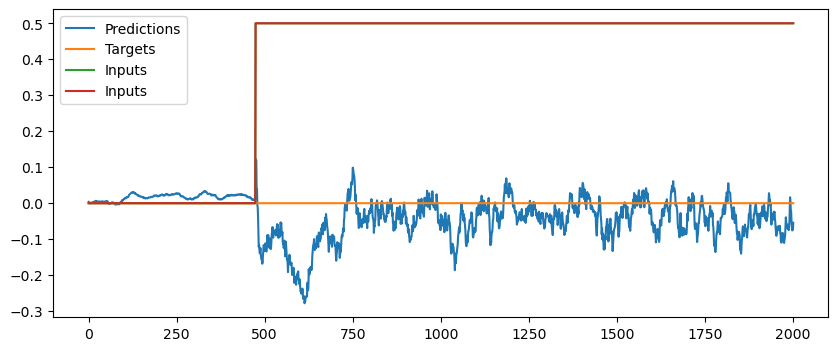

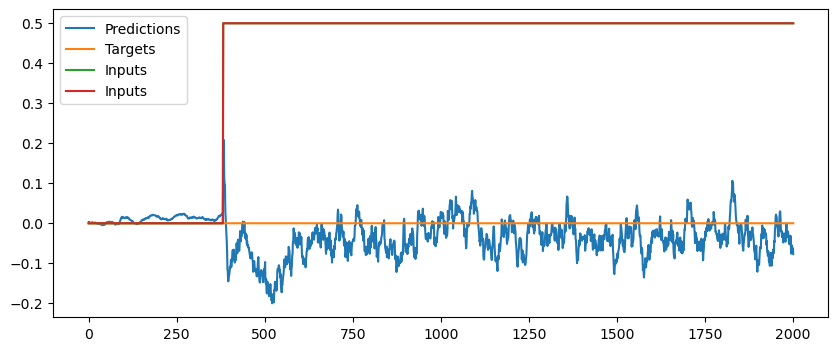

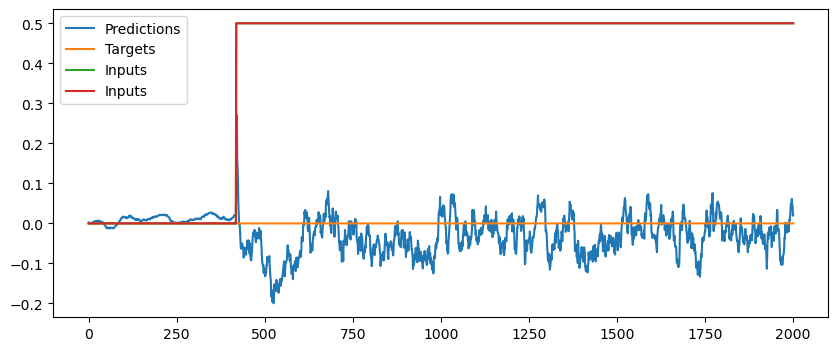

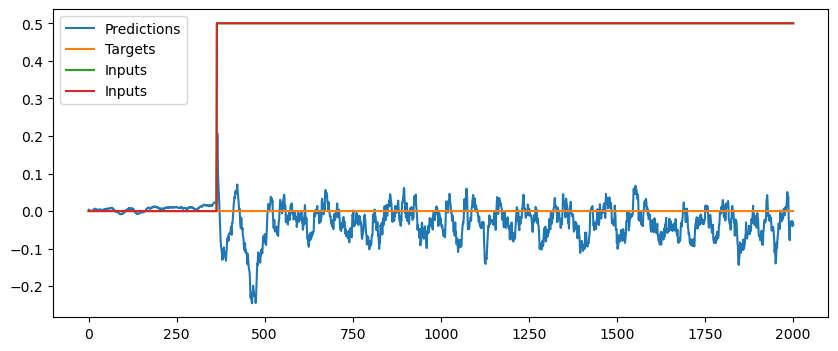

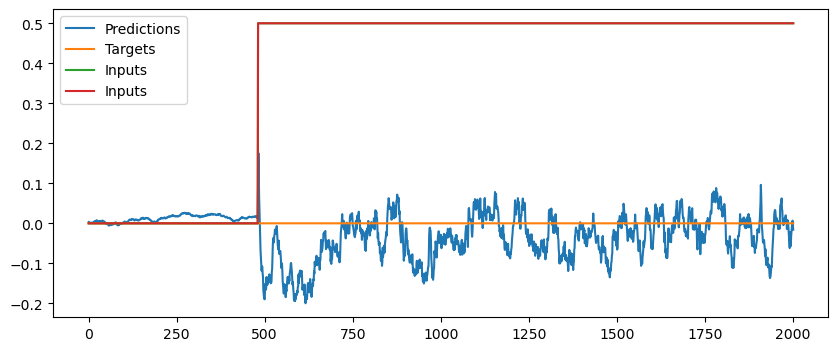

In [ ]:
hidden = analysis.plot_example(fitmodel, plotting_data, 'cpu', torch.Generator().manual_seed(0), None, returnhidden=True, noise=True)

In [ ]:
from sklearn.decomposition import PCA

# Reshape hidden to (samples, features)
hidden_reshaped = hidden.reshape(-1, hidden.shape[-1])
hidden_reshaped.shape
# Perform PCA
pca = PCA(n_components=2)
pca.fit(hidden_reshaped)
example = pca.transform(hidden[:,0,:])

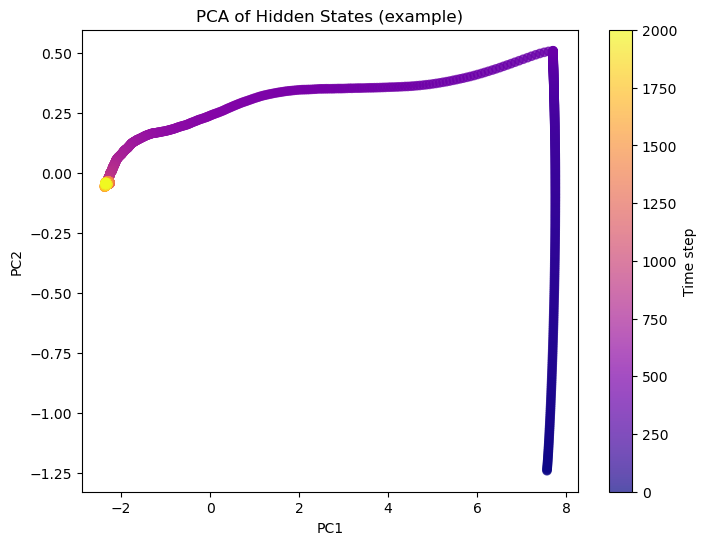

In [ ]:
plt.figure(figsize=(8,6))
time_indices = np.arange(example.shape[0])
sc = plt.scatter(example[:, 0], example[:, 1], c=time_indices, cmap='plasma', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Hidden States (example)')
plt.colorbar(sc, label='Time step')
plt.show()

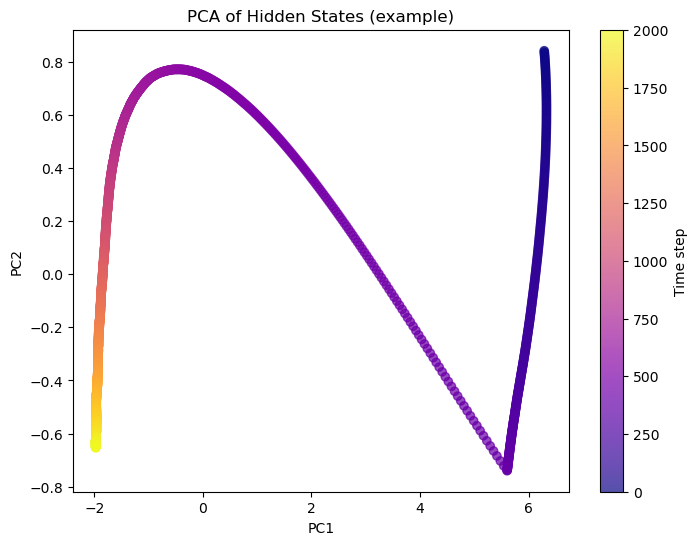

In [ ]:
plt.figure(figsize=(8,6))
time_indices = np.arange(example.shape[0])
sc = plt.scatter(example[:, 0], example[:, 1], c=time_indices, cmap='plasma', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Hidden States (example)')
plt.colorbar(sc, label='Time step')
plt.show()

In [51]:
train_loss = np.load('decay_review_0/train_losses.npy')
val_loss = np.load('decay_review_0/val_losses.npy')
train_loss2 = np.load('recurrance_review_0/train_losses.npy')
val_loss2 = np.load('recurrance_review_0/val_losses.npy')
train_loss3 = np.load('all_review_0/train_losses.npy')
val_loss3 = np.load('all_review_0/val_losses.npy')
train_loss4 = np.load('input_review_0/train_losses.npy')
val_loss4 = np.load('input_review_0/val_losses.npy')
train_loss5 = np.load('vanilla_review_0/train_losses.npy')
val_loss5 = np.load('vanilla_review_0/val_losses.npy')
train_loss6 = np.load('uniform_decay_review_0/train_losses.npy')
val_loss6 = np.load('uniform_decay_review_0/val_losses.npy')
train_loss7 = np.load('uniform_recur_0/train_losses.npy')
val_loss7 = np.load('uniform_recur_0/val_losses.npy')

/var/folders/48/lxr9wxxd4yq06qqj9jrz69780000gt/T/ipykernel_83075/2914699533.py:21: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,25)


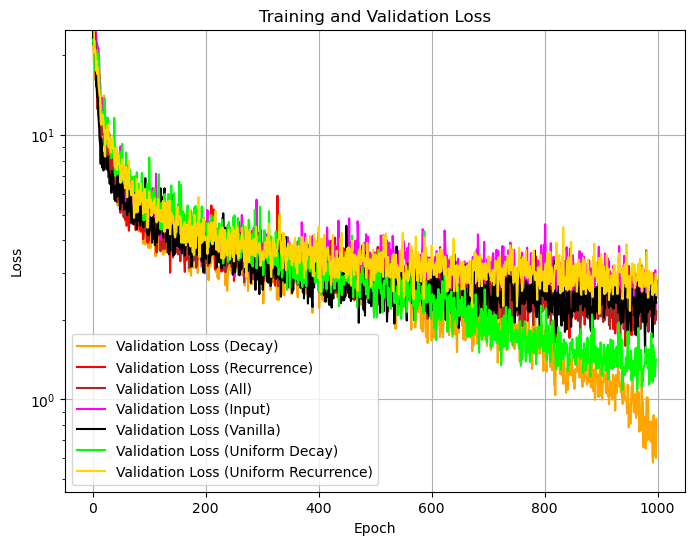

In [54]:
plt.figure(figsize=(8,6))
# plt.plot(train_loss[1:], label='Train Loss (Decay)', color='blue')
plt.plot(val_loss[1:], label='Validation Loss (Decay)', color='orange')
# plt.plot(train_loss2[1:], label='Train Loss (Recurrence)', color='green')
plt.plot(val_loss2[1:], label='Validation Loss (Recurrence)', color='red')
# plt.plot(train_loss3[1:], label='Train Loss (All)', color='purple')
plt.plot(val_loss3[1:], label='Validation Loss (All)', color='brown')
# plt.plot(train_loss4[1:], label='Train Loss (Input)', color='cyan')
plt.plot(val_loss4[1:], label='Validation Loss (Input)', color='magenta')
# plt.plot(train_loss5[1:], label='Train Loss (Vanilla)', color='gray')
plt.plot(val_loss5[1:], label='Validation Loss (Vanilla)', color='black')
# plt.plot(train_loss6[1:], label='Train Loss (Uniform Decay)', color='teal')
plt.plot(val_loss6[1:], label='Validation Loss (Uniform Decay)', color='lime')
# plt.plot(train_loss7[1:], label='Train Loss (Uniform Recurrence)', color='coral')
plt.plot(val_loss7[1:], label='Validation Loss (Uniform Recurrence)', color='gold')
plt.yscale('log')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.ylim(0,25)
plt.legend(loc='lower left')
plt.grid()
plt.show()

In [26]:
np.min(val_loss), np.argmin(val_loss), np.min(train_loss), np.argmin(train_loss)

(np.float64(0.5764985680580139),
 np.int64(993),
 np.float64(0.6499129849321702),
 np.int64(993))

In [40]:
val_loss[637]

np.float64(2.1538126468658447)

In [60]:
from scipy.stats import truncnorm
def get_tau_array(distribution, hidden_size,  device, tau_groups=None, tau_proportions=None, tau_min=None, tau_max=None, tau_mean1=None, tau_mean2=None, tau_std1=None, tau_std2=None, tau_change=None):
    if distribution == 'groups':
        tau_array = torch.zeros(hidden_size, dtype=torch.float32, device=device)
        tausizes = [int(p * hidden_size) for p in tau_proportions]
        tauindices = [0] + list(accumulate(tausizes))
        for i, tau in enumerate(tau_groups):
            tau_array[tauindices[i]:tauindices[i+1]] = tau
        return tau_array
    elif distribution == 'uniform':
        if tau_min is None or tau_max is None:
            raise ValueError("tau_min and tau_max must be provided for uniform distribution.")
        return torch.FloatTensor(hidden_size).uniform_(tau_min, tau_max).to(device)
    elif distribution == 'bimodal_normal':
        tau_array = torch.zeros(hidden_size, dtype=torch.float32, device=device)
        tausizes = [int(p * hidden_size) for p in tau_proportions]
        tauindices = [0] + list(accumulate(tausizes))

        if tau_mean1 < tau_mean2:
            lesser_mean = tau_mean1
            greater_mean = tau_mean2
            lesser_std = tau_std1
            greater_std = tau_std2
        else:
            lesser_mean = tau_mean2
            greater_mean = tau_mean1
            lesser_std = tau_std2
            greater_std = tau_std1
        #normal1
        a1 = (tau_min - lesser_mean) / lesser_std
        b1 = (tau_change - lesser_mean) / lesser_std

        tau_array[tauindices[0]:tauindices[1]] = torch.tensor(truncnorm.rvs(a1, b1, loc=lesser_mean, scale=lesser_std, size=tausizes[0]))

        #normal2
        a2 = (tau_change - greater_mean) / greater_std
        b2 = (tau_max - greater_mean) / greater_std
        tau_array[tauindices[1]:tauindices[2]] = torch.tensor(truncnorm.rvs(a2, b2, loc=greater_mean, scale=greater_std, size=tausizes[1]))

        return tau_array

In [70]:
dist = get_tau_array('bimodal_normal', 100, 'cpu', tau_proportions=[0.5, 0.5], tau_min=1, tau_max=15, tau_mean1=5, tau_mean2=10, tau_std1=0.5, tau_std2=0.5, tau_change=7.5)

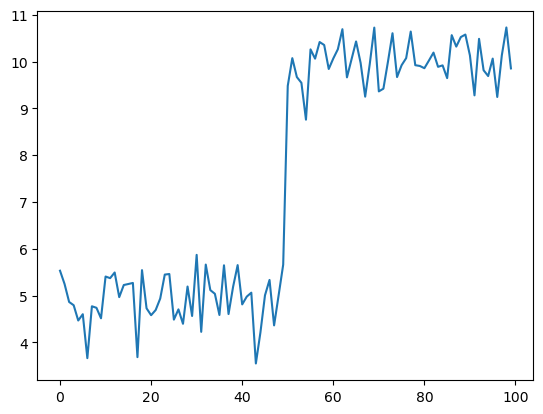

In [71]:
plt.plot(dist)

(array([0.12536252, 0.        , 0.08357501, 0.16715003, 0.41787507,
        0.29251255, 0.29251255, 0.37608756, 0.29251255, 0.04178751,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.04178742, 0.        , 0.12536227, 0.12536227,
        0.25072554, 0.50144908, 0.4178759 , 0.29251197, 0.33430072]),
 array([ 3.54797769,  3.78728366,  4.02658987,  4.26589584,  4.50520182,
         4.74450779,  4.98381376,  5.22311974,  5.46242571,  5.70173168,
         5.94103765,  6.18034363,  6.41965008,  6.65895557,  6.89826202,
         7.13756752,  7.37687397,  7.61617947,  7.85548592,  8.09479141,
         8.33409786,  8.57340336,  8.81270981,  9.0520153 ,  9.29132175,
         9.5306282 ,  9.7699337 , 10.00924015, 10.24854565, 10.4878521 ,
        10.72715759]),
 <BarContainer object of 30 artists>)

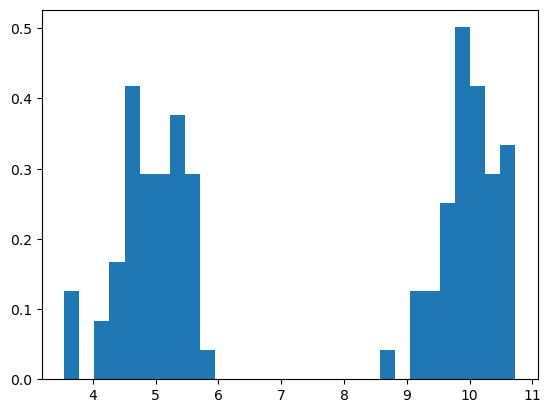

In [72]:
plt.hist(dist, bins=30, density=True)